# Importing Required Libraries & Datasets

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

In [231]:
sns.set(rc={'figure.figsize':(15,10)})

In [232]:
raw_data = pd.read_csv('loan.csv', index_col='id')

In [233]:
raw_data.head(7)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
312505,312443,500,500.0,450.0,36 months,9.76%,16.08,B,B2,"Hughes, Hubbard & Reed LLP",...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
242695,242682,500,500.0,500.0,36 months,10.71%,16.31,B,B5,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
216698,174214,500,500.0,500.0,36 months,10.46%,16.25,B,B5,THe University of Illinois,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
211133,210644,500,500.0,475.0,36 months,11.41%,16.47,C,C3,Global Travel International -and- Global Domai...,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
164346,163835,500,500.0,400.0,36 months,8.07%,15.69,A,A4,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
306018,305720,700,700.0,700.0,36 months,12.29%,23.35,C,C5,SDSU Residential Life,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
311591,311571,725,725.0,650.0,36 months,7.37%,22.51,A,A1,"Team Awesome Productions, Inc.",...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# 1. Cleaning Data

### This step involves cleaning data and converting them into respective formats and creating new categorical columsn (if required) which can be easily considered for quick calculations

### 1.1 Formatting Funded Amount Column Into Funding Category

In [234]:
raw_data['funded_amount_category'] = raw_data['funded_amnt'].apply(lambda x: math.ceil(x/1000.00) * 1000)

### 1.2 Formatting Loan Term Column

In [235]:
def extract_valid_month_from_months_column(row):
    row = re.sub('[A-Za-z, ]', '', str(row))
    return int(row)

In [236]:
raw_data['term'] = raw_data.term.apply(extract_valid_month_from_months_column)

### 1.3 Formatting Interest Column to Float Value & also creating new categorical variable

In [237]:
def extract_valid_float_from_cell(row):
    row = re.sub('[%, ]', '', str(row))
    return float(row)

In [238]:
raw_data['int_rate'] = raw_data.int_rate.apply(extract_valid_float_from_cell)

In [239]:
raw_data['int_rate_category'] = raw_data['int_rate'].apply(lambda x: math.ceil(x))

### 1.4 Formatting Sub-Grade Column

##### While comparing Grade & Sub-Grade column, it is observed that, alphabet in Sub-Grade column is same as alphabet in Grade Column. This can be verified by printing rows where value of "Grade" column is not equal to alphabet in "Sub-Grade" column. (If there are no values i.e. count is zero, while comparing this, we can be assured to drop alphabet from Sub-Grade column)

In [240]:
raw_data[raw_data['grade'] != raw_data.sub_grade.apply(lambda x: x[:1])].grade.count()

0

##### So, we will proceed ahead with creating a new column which have only the number present in sub-grade column

In [241]:
def remove_alphabet_from_sub_grade_column(row):
    row = re.sub('[A-Za-z]', '', str(row))
    return int(row)

In [242]:
raw_data['sub_grade_only_number'] = raw_data.sub_grade.apply(remove_alphabet_from_sub_grade_column)

### 1.5 Formatting Employee Length (Years of Experience) Column

In [243]:
def clean_employee_length_column(row):
    row = re.sub('[A-Za-z, ]', '', str(row))
    if row == '<1':
        return 0
    elif row == '10+':
        return 10
    elif row == '':
        return np.nan
    else:
        return float(row)

In [244]:
raw_data['emp_length'] = raw_data.emp_length.apply(clean_employee_length_column)

### 1.6 Formatting Ownership Column (Creating new mapped column)

In [245]:
ownership_status_list = list(raw_data.home_ownership.unique())
ownership_status_list.sort()

In [246]:
ownership_dict = {value: index for index, value in enumerate(ownership_status_list)}
ownership_dict

{'MORTGAGE': 0, 'NONE': 1, 'OTHER': 2, 'OWN': 3, 'RENT': 4}

In [247]:
raw_data['home_ownership_mapped'] = raw_data.home_ownership.map(ownership_dict)

### 1.7 Formatting Annual Income / Salary Column (Creating new mapped column)

In [248]:
raw_data['annual_inc_category'] = raw_data['annual_inc'].apply(lambda x: math.ceil(x/50000.00) * 50000)

### 1.8 Formatting Salary Verification Column (Creating new mapped column)

In [249]:
salary_verify_status_list = list(raw_data.verification_status.unique())
salary_verify_status_list.sort()

In [250]:
income_verification_dict = {value: index for index, value in enumerate(salary_verify_status_list)}
income_verification_dict

{'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}

In [251]:
raw_data['verification_status_mapped'] = raw_data.verification_status.map(income_verification_dict)

### 1.9 Formatting Loan Issue Date to datetime object & Creating Seperate Column for Month & Year

In [252]:
raw_data['issue_d'] = pd.to_datetime(raw_data.issue_d, format='%b-%y')

In [253]:
raw_data['issue_d_year'] = pd.DatetimeIndex(raw_data['issue_d']).year

In [254]:
raw_data['issue_d_month'] = pd.DatetimeIndex(raw_data['issue_d']).month

##### Note: After reaching proper solution, if column by name 'issue_d' is not required, kinldy drop that column here

In [255]:
# raw_data = raw_data.drop(columns = ['issue_d'])

### 1.10 Formatting Loan Status Column (Creating new mapped column)

In [256]:
loan_status_list = list(raw_data.loan_status.unique())
loan_status_list.sort()

In [257]:
loan_status_dict = {value: index for index, value in enumerate(loan_status_list)}
loan_status_dict

{'Charged Off': 0, 'Current': 1, 'Fully Paid': 2}

In [258]:
raw_data['loan_status_mapped'] = raw_data.loan_status.map(loan_status_dict)

### 1.11 Payment Plan Column can be dropped off, as all the records in this column contains same value

In [259]:
if 'pymnt_plan' in raw_data.columns:
    raw_data = raw_data.drop(columns=['pymnt_plan'])

### 1.12 Formatting Purpose Column

In [260]:
raw_data['purpose'] = raw_data.purpose.apply(lambda x: x.replace('_', ' ').title())

### 1.13 Mapping Address State Column With Complete State Name

##### Creating a dictionary of all the states In US and their respective state abbreviation

In [261]:
full_state_list = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

In [262]:
raw_data['addr_state_name'] = raw_data.addr_state.map(full_state_list)

### 1.14 Creating DTI Category Column

In [263]:
raw_data['dti_category'] = raw_data['dti'].apply(lambda x: math.ceil(x))

### 1.15 Formatting Earliest Credit Line Column to Valid Date object

In [264]:
raw_data['earliest_cr_line'] = pd.to_datetime(raw_data.earliest_cr_line, format='%b-%y')

In [265]:
raw_data['earliest_cr_line_month'] = pd.DatetimeIndex(raw_data['earliest_cr_line']).month

In [266]:
raw_data['earliest_cr_line_year'] = pd.DatetimeIndex(raw_data['earliest_cr_line']).year

##### Note: After reaching proper solution, if column by name 'earliest_cr_line_year' is not required, kinldy drop that column here

In [267]:
# raw_data = raw_data.drop(columns = ['earliest_cr_line_year'])

### 1.16 Formatting Months Since Last Delinq(Default) & Months Since Last Record Column to Valid format

In [268]:
def clean_months_since_last_column(row):
    if type(row) == str:
        return np.nan
    else:
        return float(row)

In [269]:
raw_data['mths_since_last_delinq'] = raw_data.mths_since_last_delinq.apply(clean_months_since_last_column)

In [270]:
raw_data['mths_since_last_record'] = raw_data.mths_since_last_record.apply(clean_months_since_last_column)

### 1.17 Creating Categorical Column For Revolving Balance

In [271]:
raw_data['revol_bal_category'] = raw_data['revol_bal'].apply(lambda x: math.ceil(x/2000.00) * 2000)

### 1.18 Cleaning Revolving Utlization Percent Column & Creating Categorical Column For the same.

In [273]:
raw_data['revol_util'] = raw_data.revol_util.apply(extract_valid_float_from_cell)

In [274]:
raw_data['revol_util_category'] = raw_data['revol_util'].apply(lambda x: (math.ceil(x/10.00) * 10) if not np.isnan(x) else np.nan)

### 1.19 Categorizing Total Number of Credit Lines column

In [275]:
raw_data['total_acc_category'] = raw_data['total_acc'].apply(lambda x: math.ceil(x/5.00) * 5)

### 1.20 Initial Status Column can be dropped off, as all the records in this column contains same value.

In [278]:
if 'initial_list_status' in raw_data.columns:
    raw_data = raw_data.drop(columns=['initial_list_status'])

### 1.21 Categorizing Remaining outstanding principal column

In [336]:
raw_data['out_prncp_category'] = raw_data['out_prncp'].apply(lambda x: math.ceil(x/100.00) * 100)

### 1.22 Categorizing Outstanding Principal for Portion of Total Amount Funded by Investors Column

In [339]:
raw_data['out_prncp_inv_category'] = raw_data['out_prncp_inv'].apply(lambda x: math.ceil(x/100.00) * 100)

### 1.23 Formatting Last Payment, Next Payment & Last Credit Pull Date Column to Valid format

In [281]:
raw_data['last_pymnt_d'] = pd.to_datetime(raw_data.last_pymnt_d, format='%b-%y')

In [282]:
raw_data['next_pymnt_d'] = pd.to_datetime(raw_data.next_pymnt_d, format='%b-%y')

In [283]:
raw_data['last_credit_pull_d'] = pd.to_datetime(raw_data.last_credit_pull_d, format='%b-%y')

### 1.24 Application Type Column can be dropped off, as all the records in this column contains same value.

In [284]:
if 'application_type' in raw_data.columns:
    raw_data = raw_data.drop(columns=['application_type'])

### 1.25 Creating New Column As Percentage of Open Credit Lines Compared With Available Credit Lines

In [343]:
raw_data['ratio_of_credit_line'] = raw_data['open_acc'] / raw_data['total_acc'] * 100

In [345]:
raw_data['ratio_of_credit_line_category'] = raw_data['ratio_of_credit_line'].apply(lambda x: math.ceil(x/5.00) * 5)

### 1.26 All the columns after Application Type Column are in the correct format (i.e. float value). Hence, those columns need not have to be cleaned

# ==> 2. Comparing Data Between Charged Off & Fully Paid Customers <==

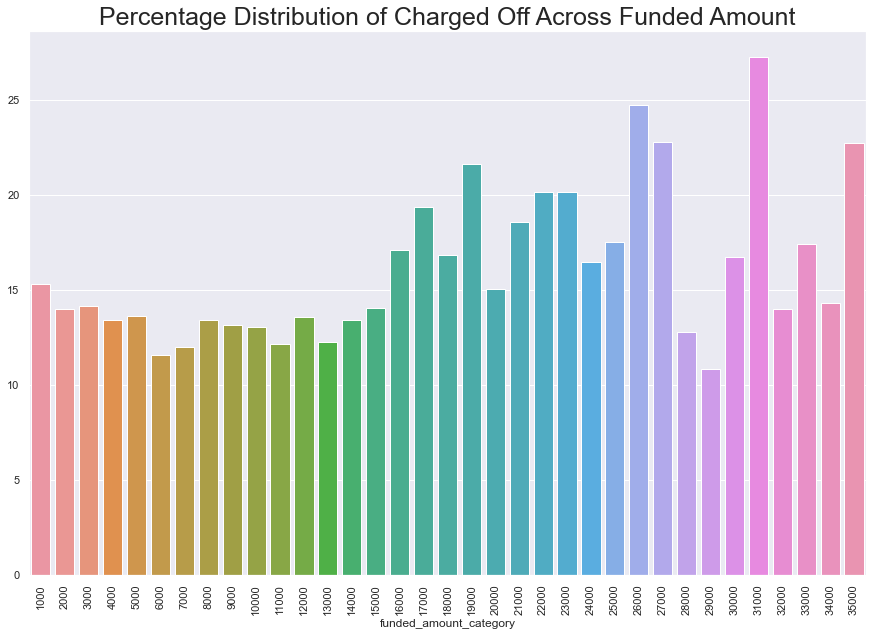

In [292]:
plot_this = raw_data.pivot_table(index='funded_amount_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Funded Amount", fontdict={'fontsize': 25})
plt.show()
# plot_this

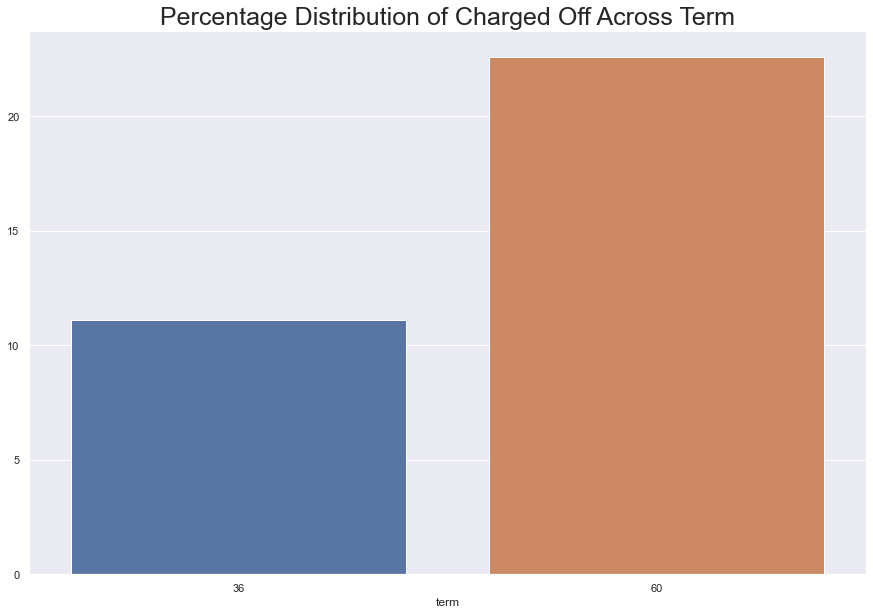

In [294]:
plot_this = raw_data.pivot_table(index='term', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Term", fontdict={'fontsize': 25})
plt.show()
# plot_this

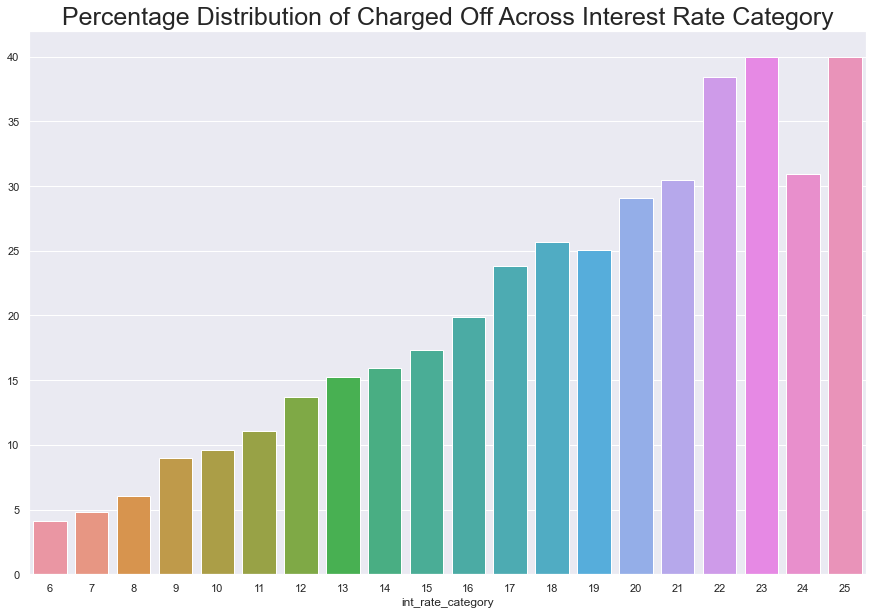

In [296]:
plot_this = raw_data.pivot_table(index='int_rate_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Interest Rate Category", fontdict={'fontsize': 25})
plt.show()
# plot_this

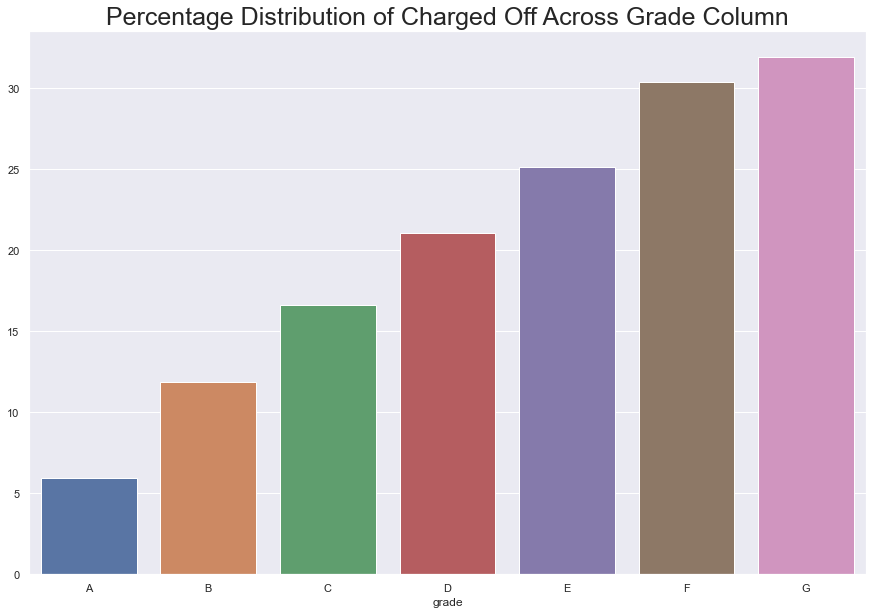

In [298]:
plot_this = raw_data.pivot_table(index='grade', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Grade Column", fontdict={'fontsize': 25})
plt.show()
# plot_this

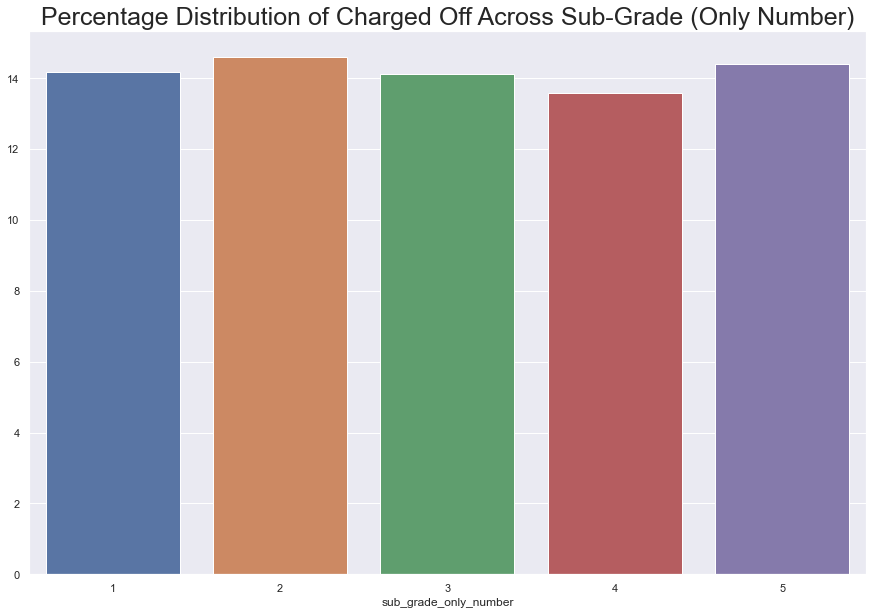

In [300]:
plot_this = raw_data.pivot_table(index='sub_grade_only_number', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Sub-Grade (Only Number)", fontdict={'fontsize': 25})
plt.show()
# plot_this

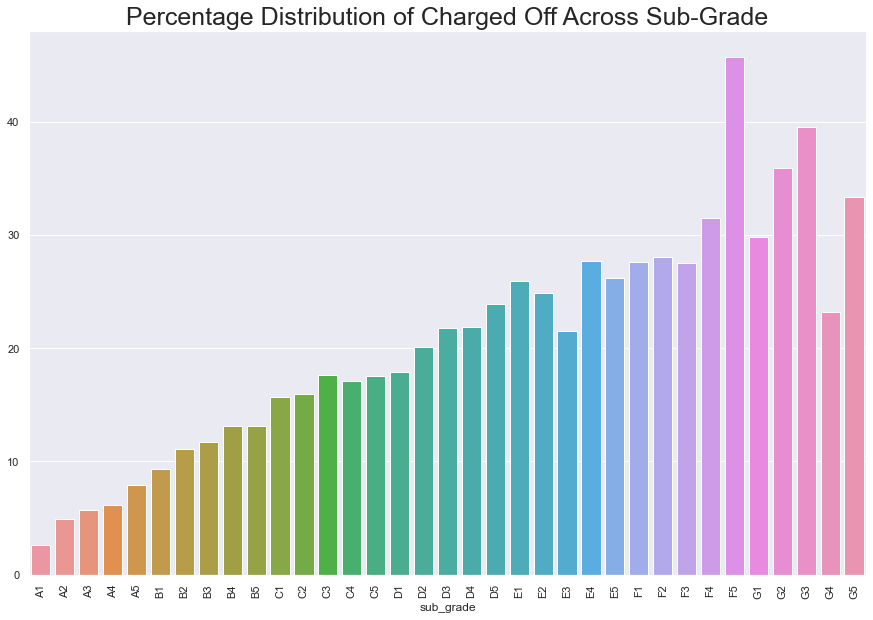

In [301]:
plot_this = raw_data.pivot_table(index='sub_grade', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Sub-Grade", fontdict={'fontsize': 25})
plt.show()
# plot_this

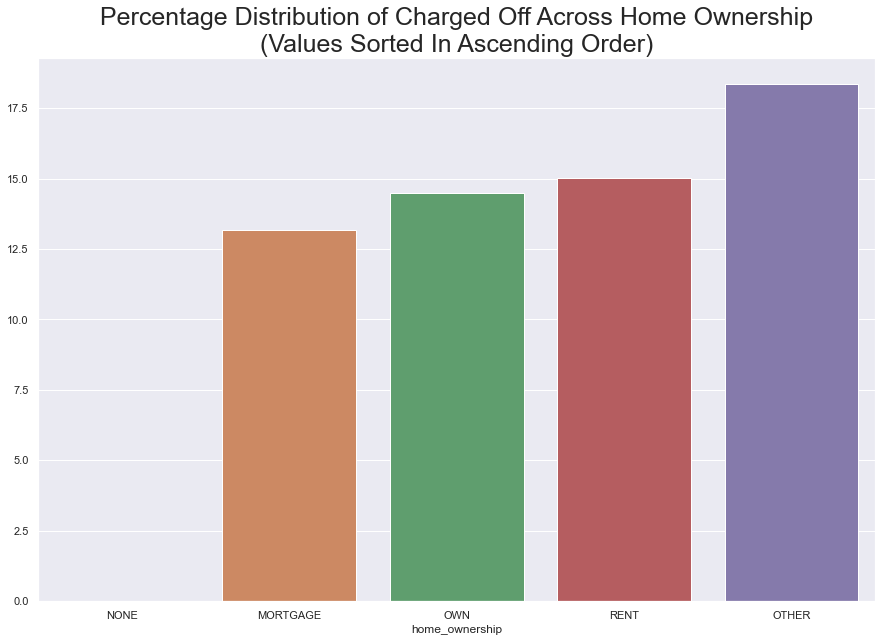

In [309]:
plot_this = raw_data.pivot_table(index='home_ownership', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
plot_this = plot_this.sort_values(by=['Charged Off'])
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Home Ownership\n(Values Sorted In Ascending Order)", fontdict={'fontsize': 25})
plt.show()
# plot_this

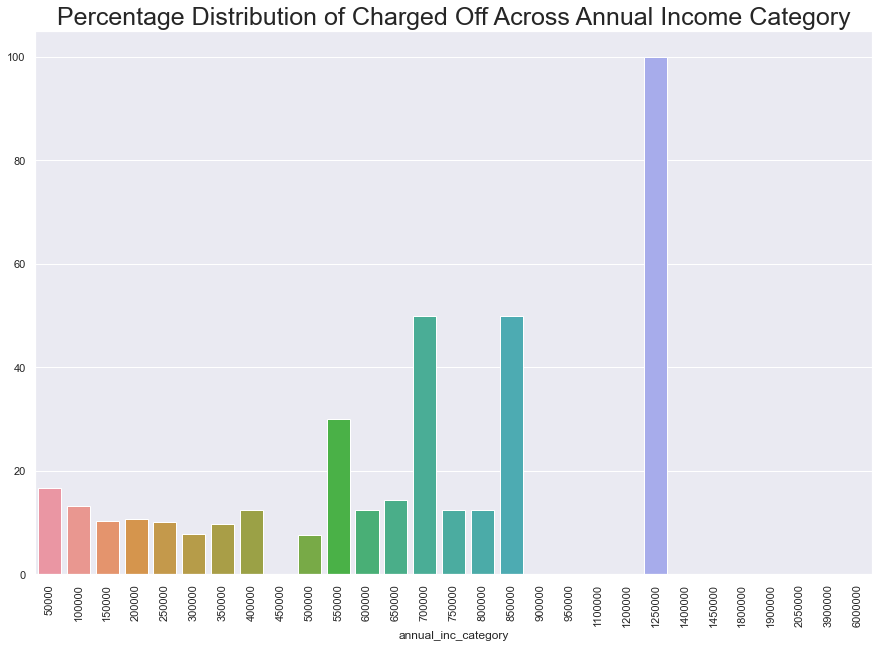

In [305]:
plot_this = raw_data.pivot_table(index='annual_inc_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Annual Income Category", fontdict={'fontsize': 25})
plt.show()
# plot_this

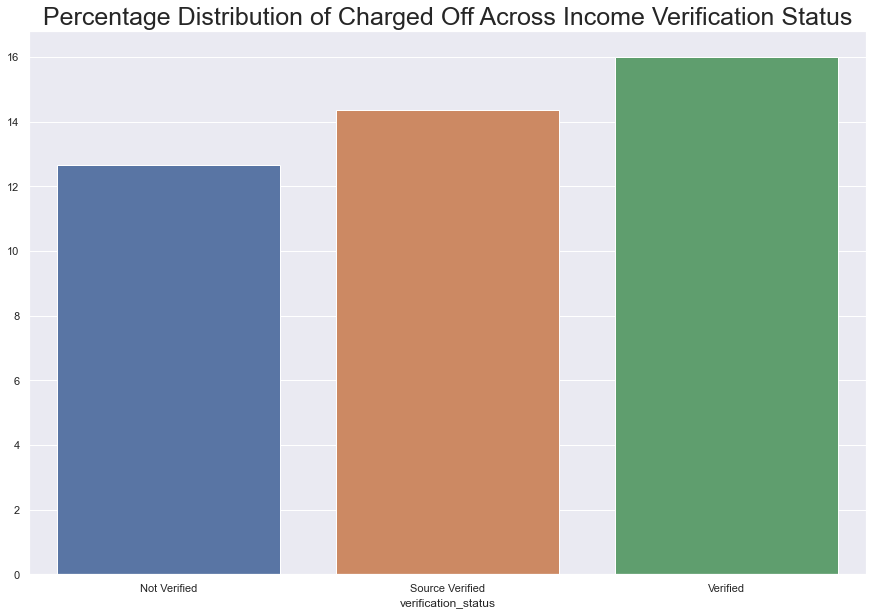

In [308]:
plot_this = raw_data.pivot_table(index='verification_status', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Income Verification Status", fontdict={'fontsize': 25})
plt.show()
# plot_this

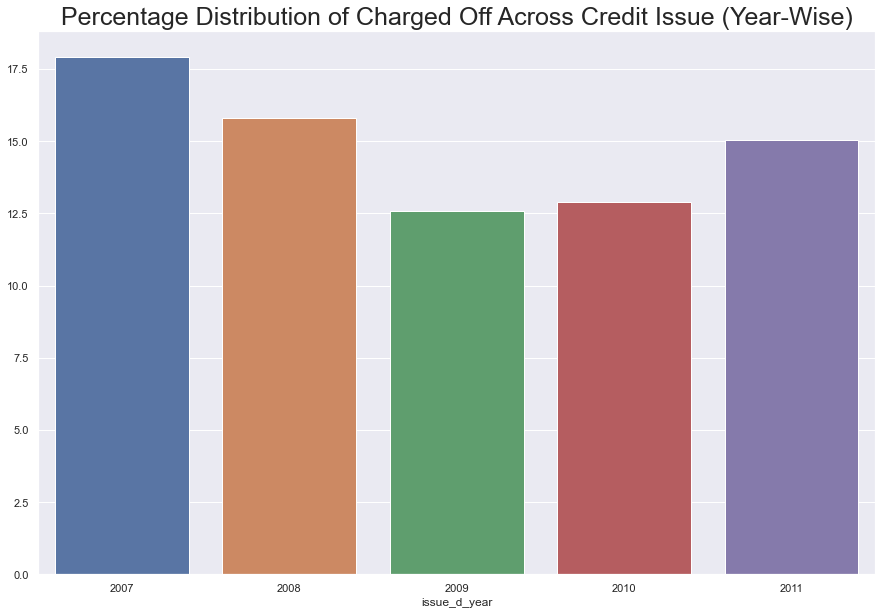

In [310]:
plot_this = raw_data.pivot_table(index='issue_d_year', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Credit Issue (Year-Wise)", fontdict={'fontsize': 25})
plt.show()
# plot_this

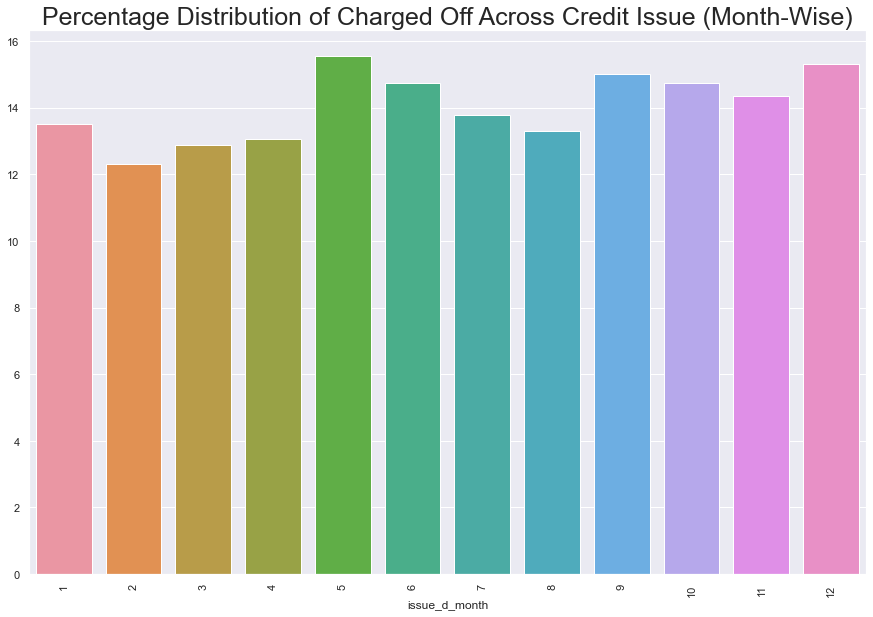

In [311]:
plot_this = raw_data.pivot_table(index='issue_d_month', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Credit Issue (Month-Wise)", fontdict={'fontsize': 25})
plt.show()
# plot_this

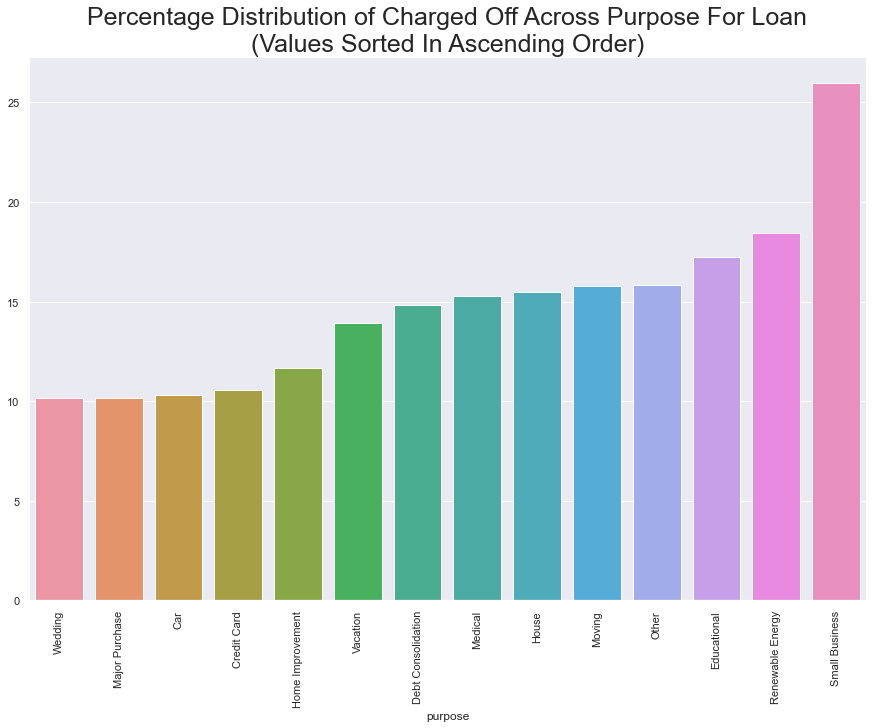

In [312]:
plot_this = raw_data.pivot_table(index='purpose', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
plot_this = plot_this.sort_values(by=['Charged Off'])
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Purpose For Loan\n(Values Sorted In Ascending Order)", fontdict={'fontsize': 25})
plt.show()
# plot_this

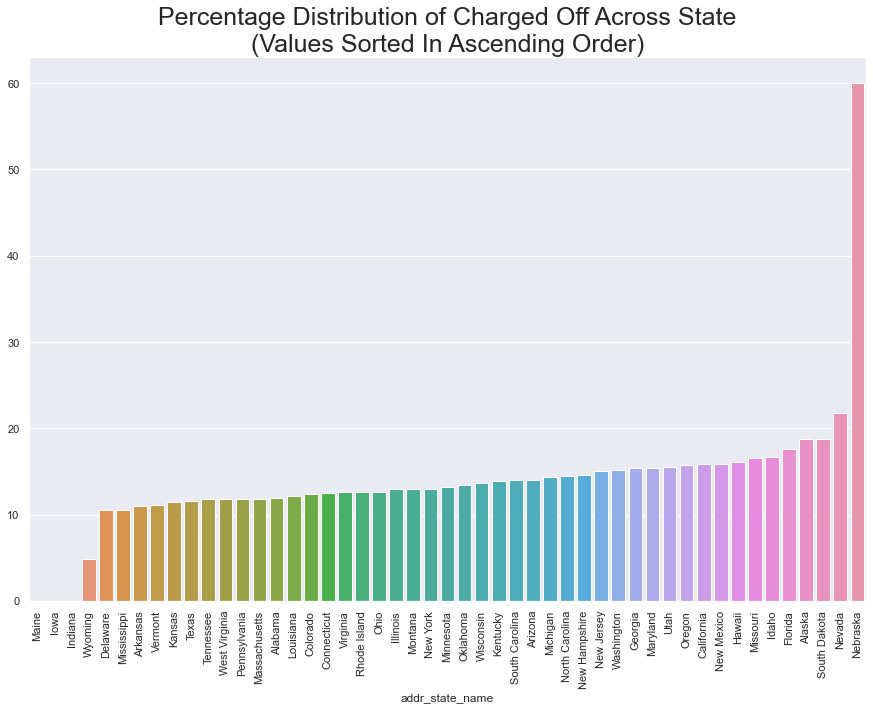

In [313]:
plot_this = raw_data.pivot_table(index='addr_state_name', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
plot_this = plot_this.sort_values(by=['Charged Off'])
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across State\n(Values Sorted In Ascending Order)", fontdict={'fontsize': 25})
plt.show()
# plot_this

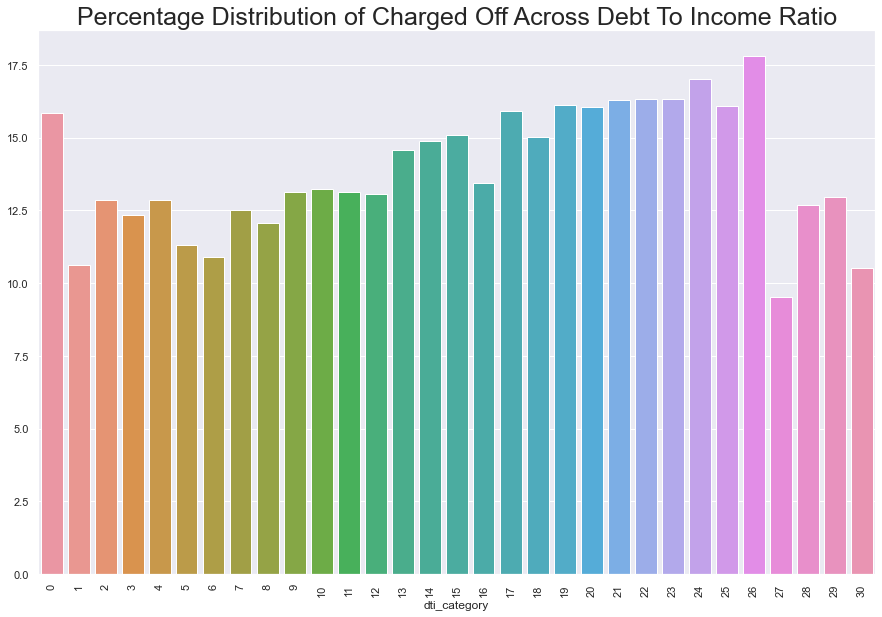

In [314]:
plot_this = raw_data.pivot_table(index='dti_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Debt To Income Ratio", fontdict={'fontsize': 25})
plt.show()
# plot_this

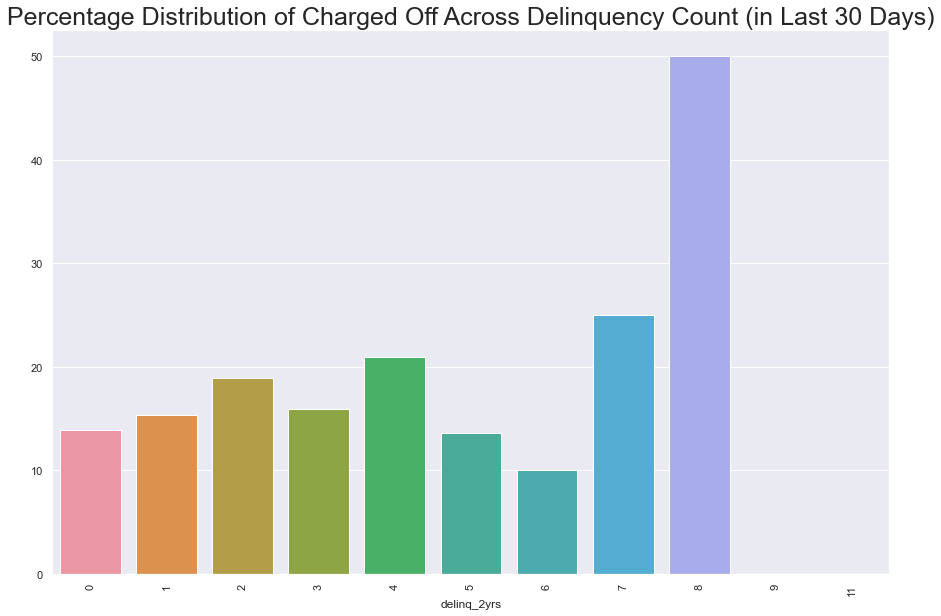

In [315]:
plot_this = raw_data.pivot_table(index='delinq_2yrs', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Delinquency Count (in Last 30 Days)", fontdict={'fontsize': 25})
plt.show()
# plot_this

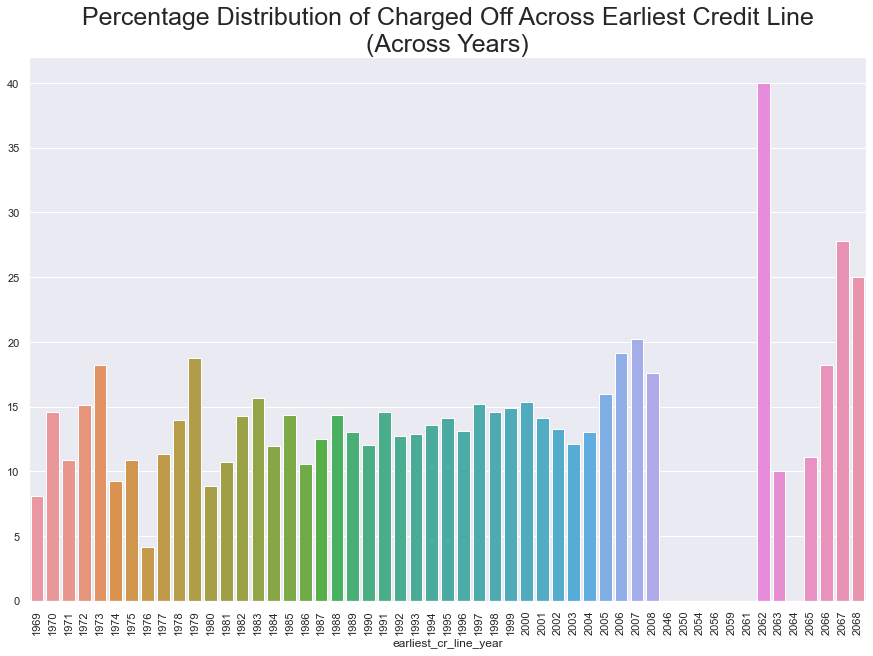

In [318]:
plot_this = raw_data.pivot_table(index='earliest_cr_line_year', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Earliest Credit Line\n(Across Years)", fontdict={'fontsize': 25})
plt.show()
# plot_this

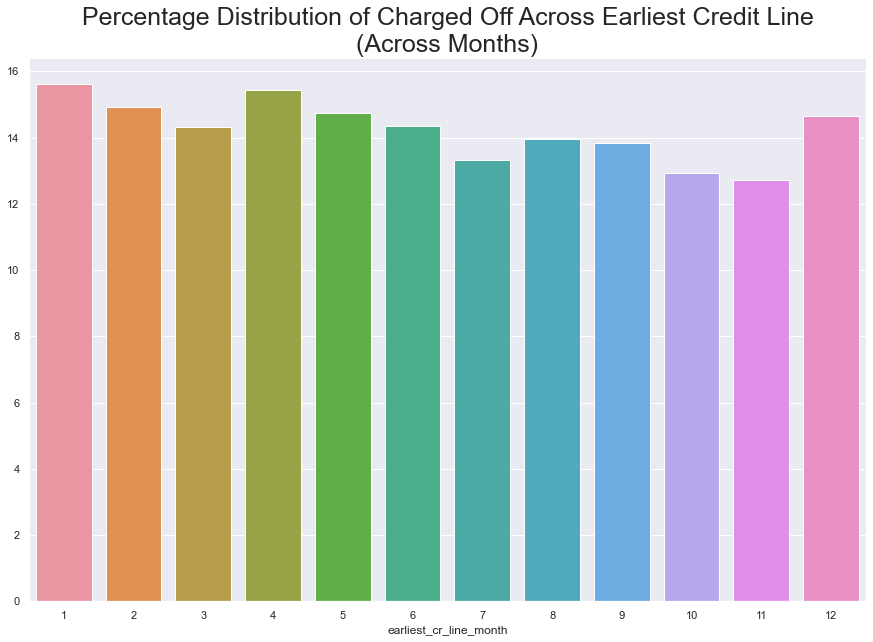

In [321]:
plot_this = raw_data.pivot_table(index='earliest_cr_line_month', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Earliest Credit Line\n(Across Months)", fontdict={'fontsize': 25})
plt.show()
# plot_this

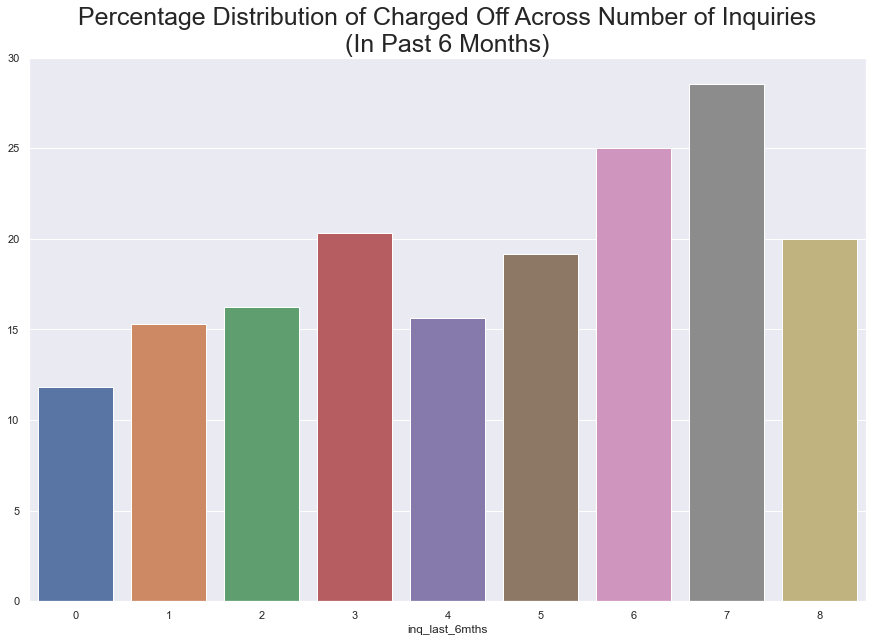

In [330]:
plot_this = raw_data.pivot_table(index='inq_last_6mths', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Number of Inquiries\n(In Past 6 Months)", fontdict={'fontsize': 25})
plt.show()
# plot_this

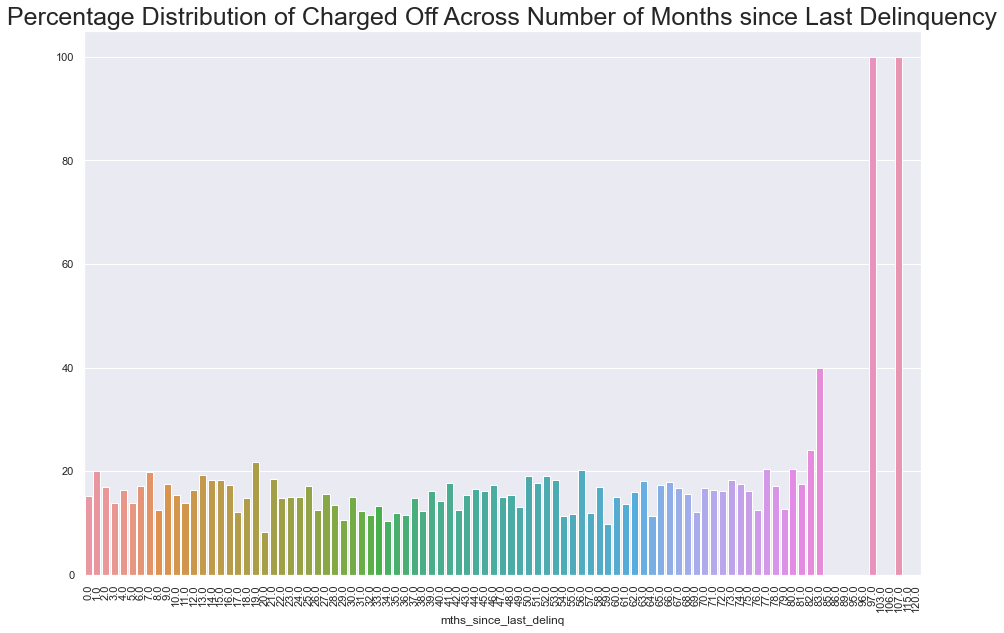

In [324]:
plot_this = raw_data.pivot_table(index='mths_since_last_delinq', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Number of Months since Last Delinquency", fontdict={'fontsize': 25})
plt.show()
# plot_this

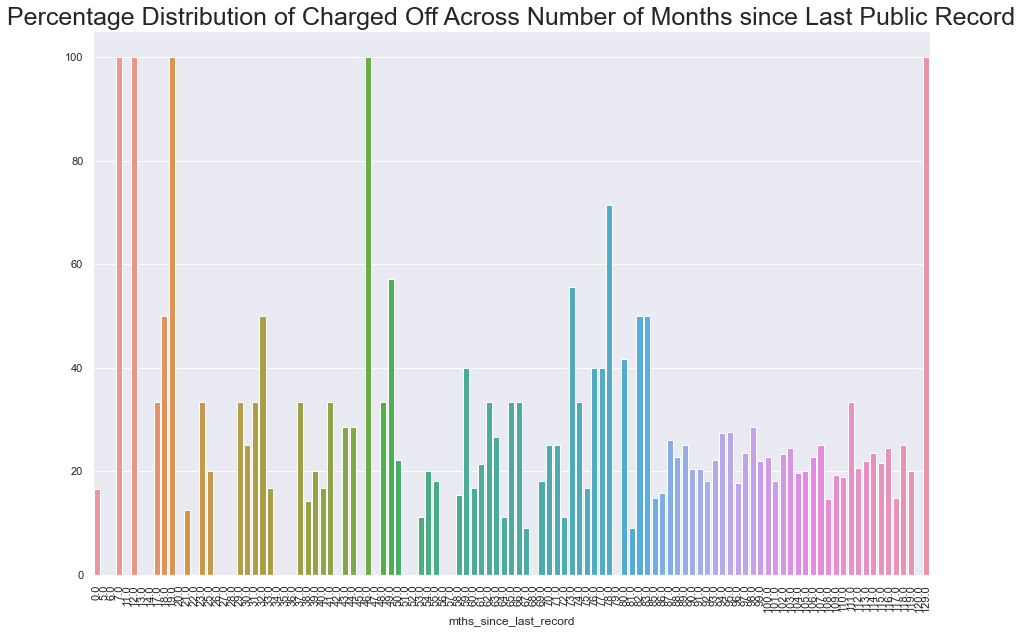

In [325]:
plot_this = raw_data.pivot_table(index='mths_since_last_record', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Number of Months since Last Public Record", fontdict={'fontsize': 25})
plt.show()
# plot_this

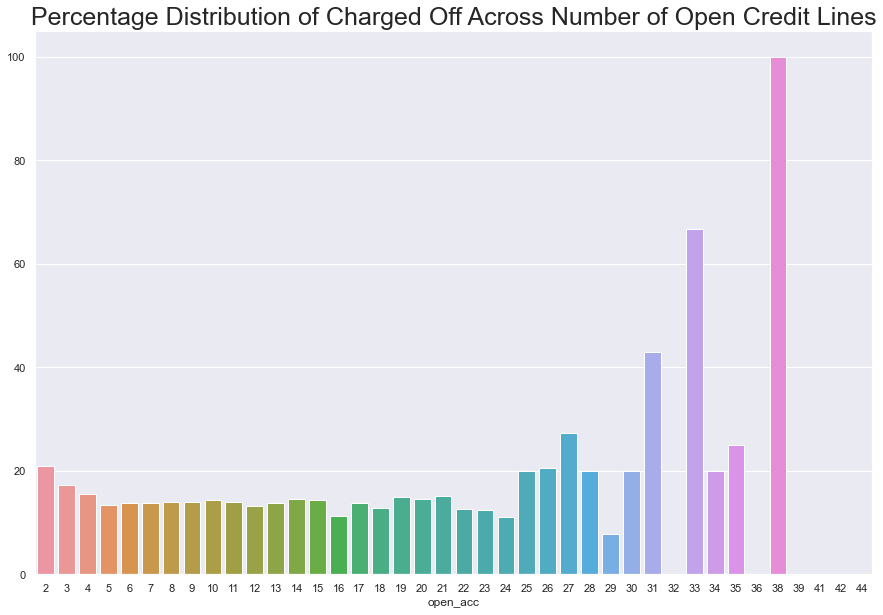

In [329]:
plot_this = raw_data.pivot_table(index='open_acc', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Number of Open Credit Lines", fontdict={'fontsize': 25})
plt.show()
# plot_this

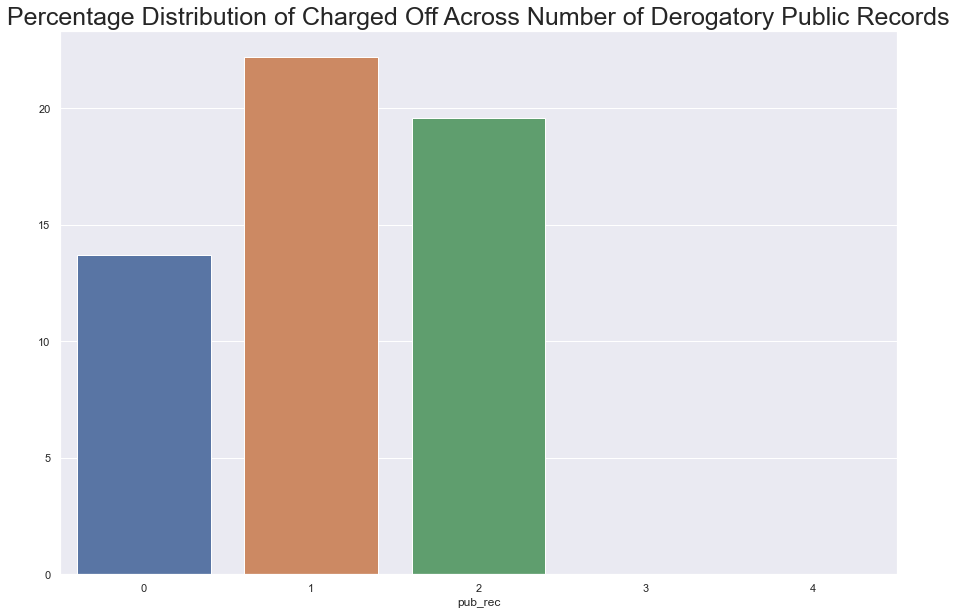

In [328]:
plot_this = raw_data.pivot_table(index='pub_rec', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Number of Derogatory Public Records", fontdict={'fontsize': 25})
plt.show()
# plot_this

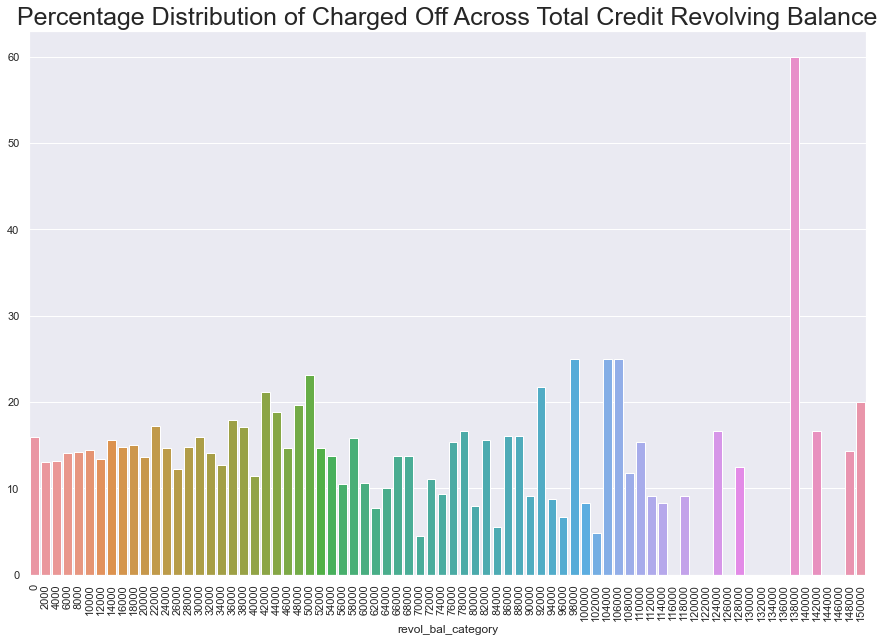

In [331]:
plot_this = raw_data.pivot_table(index='revol_bal_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Total Credit Revolving Balance", fontdict={'fontsize': 25})
plt.show()
# plot_this

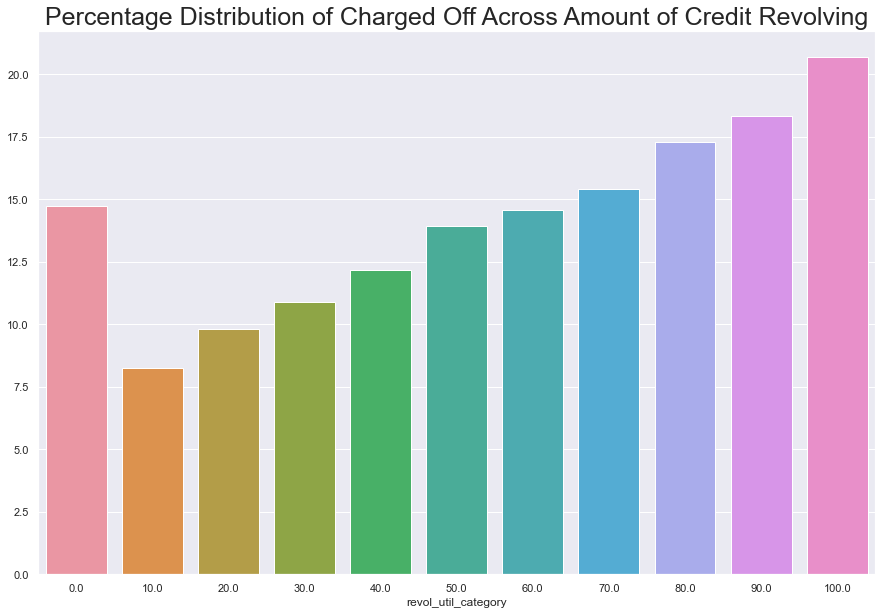

In [332]:
plot_this = raw_data.pivot_table(index='revol_util_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Percentage Distribution of Charged Off Across Amount of Credit Revolving", fontdict={'fontsize': 25})
plt.show()
# plot_this

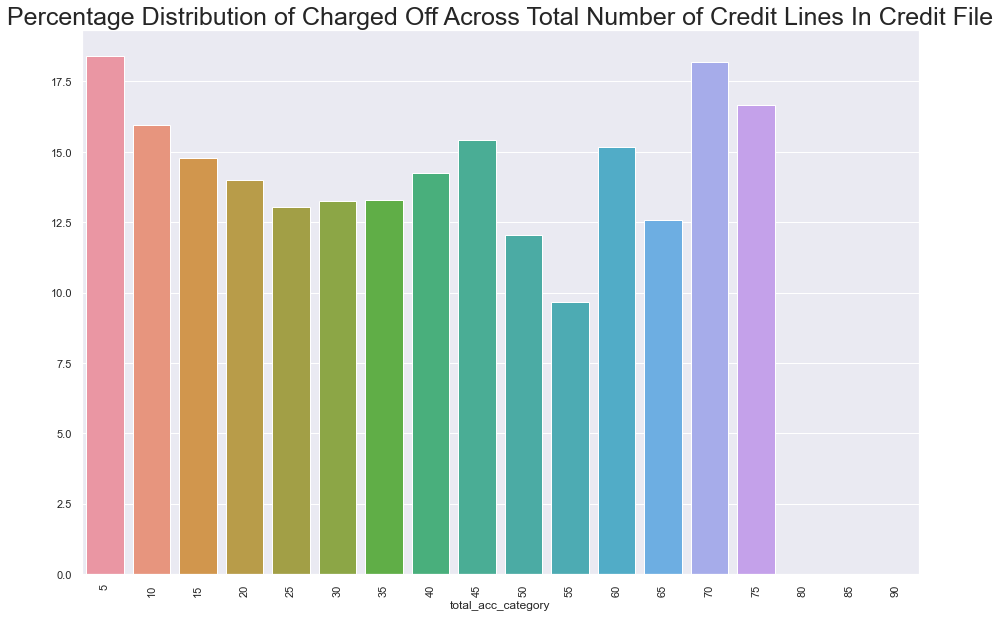

In [333]:
plot_this = raw_data.pivot_table(index='total_acc_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Total Number of Credit Lines In Credit File", fontdict={'fontsize': 25})
plt.show()
# plot_this

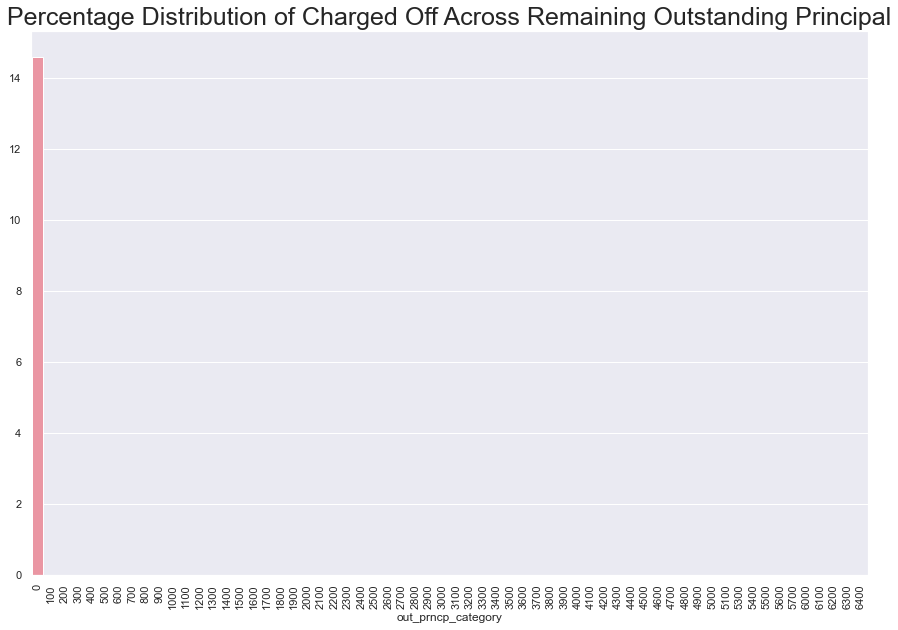

In [337]:
plot_this = raw_data.pivot_table(index='out_prncp_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Remaining Outstanding Principal", fontdict={'fontsize': 25})
plt.show()
# plot_this

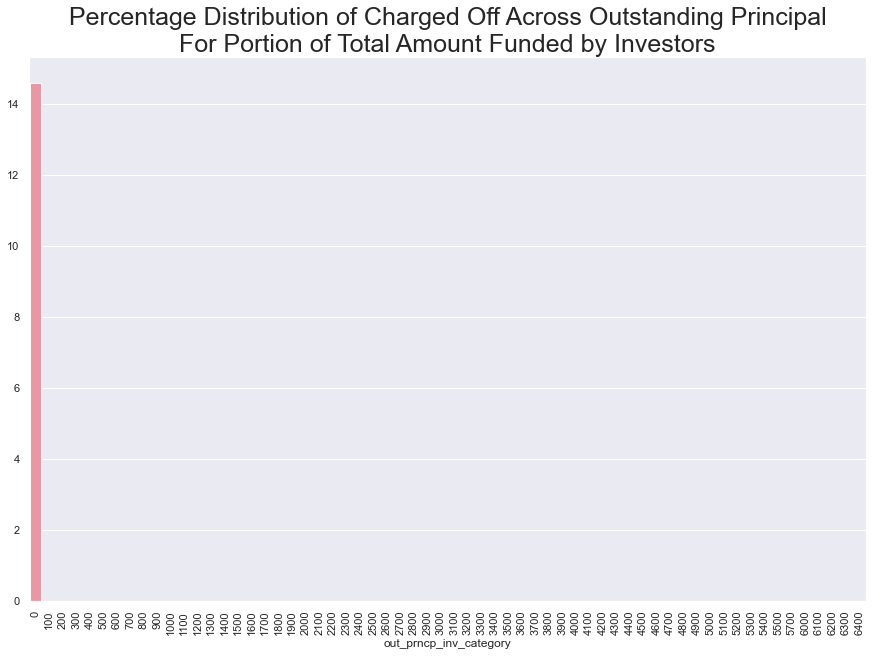

In [342]:
plot_this = raw_data.pivot_table(index='out_prncp_inv_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Outstanding Principal\nFor Portion of Total Amount Funded by Investors", fontdict={'fontsize': 25})
plt.show()
# plot_this

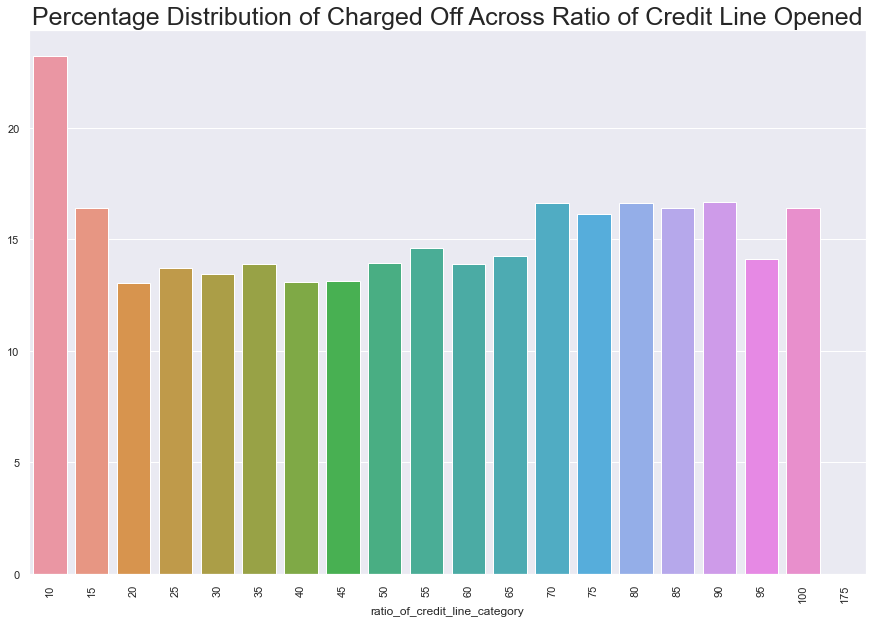

In [346]:
plot_this = raw_data.pivot_table(index='ratio_of_credit_line_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this = plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100
chart = sns.barplot(x = plot_this['Charged Off'].index, y=plot_this['Charged Off'].values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Percentage Distribution of Charged Off Across Ratio of Credit Line Opened", fontdict={'fontsize': 25})
plt.show()
# plot_this